#  Masking Pipeline

In [72]:
from chxanalys.chx_libs import (np, roi, time, datetime, os,  
        getpass, db, get_images,LogNorm, plt,ManualMask)

from chxanalys.chx_generic_functions import (get_detector, get_fields, 
            get_sid_filenames,load_data,   RemoveHot, show_img,
        get_avg_img, reverse_updown,create_cross_mask )
from skimage.draw import line_aa, line, polygon, circle
 
%matplotlib notebook

# Path for Saving Results

In [73]:
path = '/XF11ID/analysis/2016_3/masks/'
print ("The analysis results will be saved in : %s"%path)



The analysis results will be saved in : /XF11ID/analysis/2016_3/masks/


### Get the image series and metadata from the uid

In [74]:
uid = '5765b8' #count : 1 ['5765b8'] (scan num: 9887) (Measurement: XPCS series alpha=0.1,.1s &4.9s 100 frames )

In [75]:
detector = get_detector( db[uid ] )
print ('Detector is:  %s'%detector  )
sud = get_sid_filenames(db[uid])
print ('scan_id, full-uid, data path are:  %s--%s--%s'%(sud[0], sud[1], sud[2][0] ))

Detector is:  eiger4m_single_image
scan_id, full-uid, data path are:  9887--5765b836-50f0-49f6-ba9e-00e00ab2bfef--/XF11ID/data/2016/11/18/8f19f29b-5167-49fb-ad1e_9470


In [76]:
#imgs = load_data( uid, detector, reverse= True  )
imgs = load_data( uid, detector, reverse= False  )
md = imgs.md

hdf5 path = /XF11ID/data/2016/11/18/8f19f29b-5167-49fb-ad1e_9470_master.h5


In [77]:
imgs

<Frames>
Length: 100 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32

In [78]:
Nimg=len(imgs)

In [79]:
md

{'beam_center_x': 1477.0,
 'beam_center_y': 346.0,
 'count_time': 0.1,
 'detector_distance': 4.8899999,
 'frame_time': 4.9000001,
 'incident_wavelength': 1.2852099,
 'pixel_mask': array([[0, 0, 0, ..., 0, 0, 4],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32),
 'x_pixel_size': 7.5000004e-05,
 'y_pixel_size': 7.5000004e-05}

In [80]:
 pixel_mask =  1- np.int_( np.array( md['pixel_mask'], dtype= bool)  )

## show image and the pixel mask

* show image

<IPython.core.display.Javascript object>


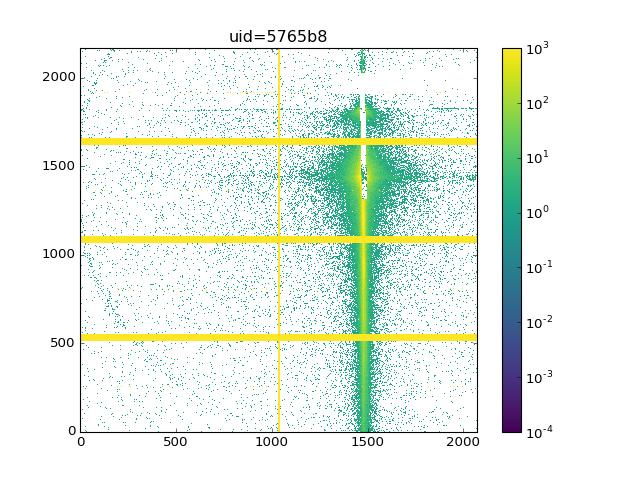

In [81]:
show_img(  imgs[0] , vmin=.0001, vmax=1000, logs=True, image_name ='uid=%s'%uid )

* pixel mask

<IPython.core.display.Javascript object>


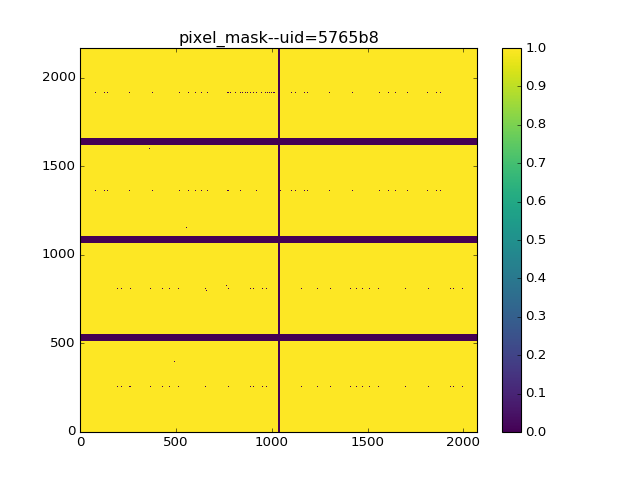

In [82]:
show_img(pixel_mask, vmin=0, vmax=1, image_name ='pixel_mask--uid=%s'%uid )

## Remove hotspots in the image

<IPython.core.display.Javascript object>


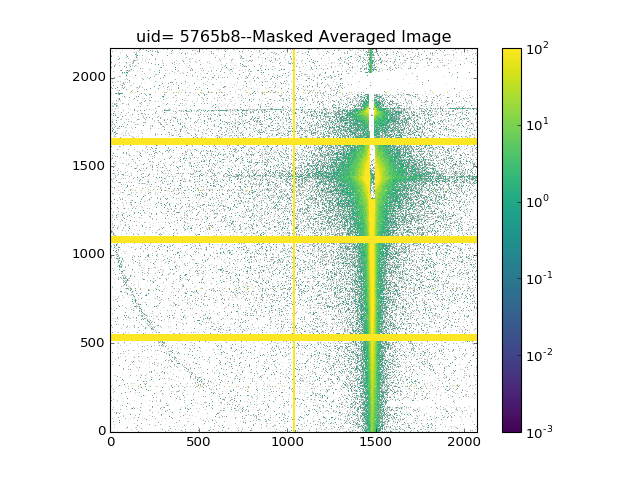

In [83]:
avg_img =  get_avg_img( imgs, sampling = 1000, plot_ = True, uid =uid)

<IPython.core.display.Javascript object>


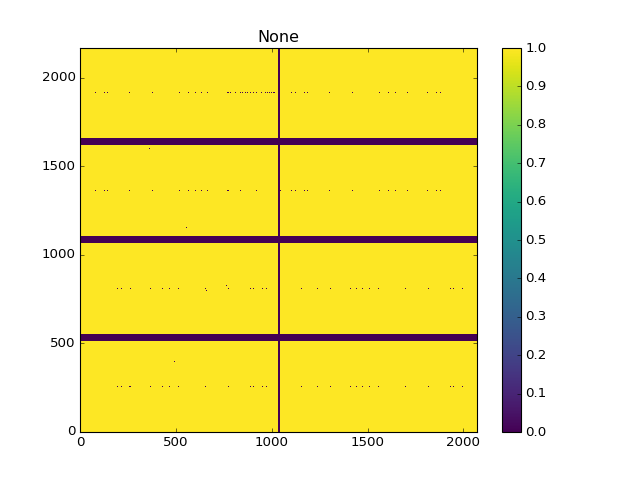

In [84]:
mask_rh  = RemoveHot( avg_img, 5E8, plot_=True)

# Create a polygon mask

In [85]:
md['beam_center_x'],2167-md['beam_center_y']

(1477.0, 1821.0)

### To create multi-rectangle masks, for each sub-mask
* in this case, create a centeral-circle and a vertical line


In [86]:
full_mask1 = create_cross_mask(  avg_img, center=[ 1473, 1300],
                            wy_left=0, wy_right= 0, 
                              wx_up= 25, wx_down= 0,center_radius= 0 )

In [87]:
full_mask2 = create_cross_mask(  avg_img, center=[ 1477, 1815],
                            wy_left=0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius= 50 )

In [88]:
full_mask = full_mask1  #* full_mask2

<IPython.core.display.Javascript object>


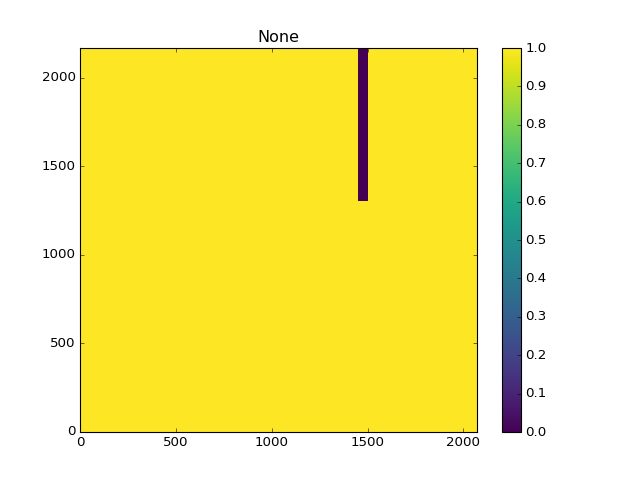

In [89]:
show_img( full_mask  )

In [90]:
mask = np.array ( full_mask * pixel_mask*mask_rh  , dtype = bool )

<IPython.core.display.Javascript object>


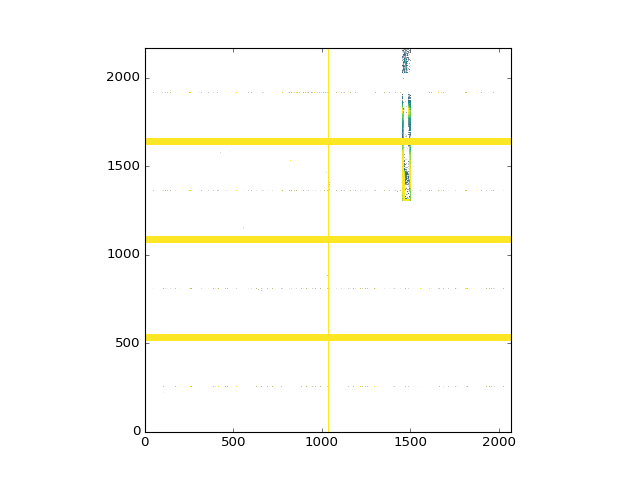

In [91]:
fig, ax = plt.subplots()
#new_mask = 
im=ax.imshow(   (~mask) * avg_img,origin='lower' , 
      norm= LogNorm( vmin=0.1, vmax= 1e2 ), cmap='viridis')
#im = ax.imshow(avg_img,  cmap='viridis',origin='lower', norm= LogNorm( vmin=0.001, vmax=100 ) )
plt.show()


<IPython.core.display.Javascript object>


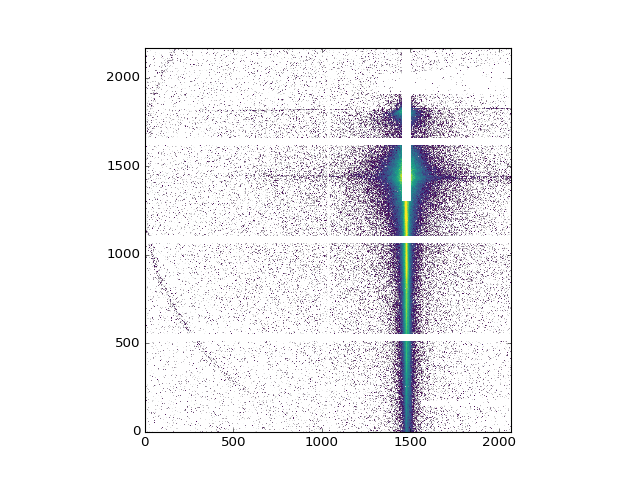

In [92]:
fig, ax = plt.subplots()
im = ax.imshow((mask)*avg_img,  cmap='viridis',origin='lower', norm= LogNorm( vmin=1, vmax=1000 ) )
plt.show()

## Combine the hand-drawn/polygon mask and the pixel mask and hot pixel mask

<IPython.core.display.Javascript object>


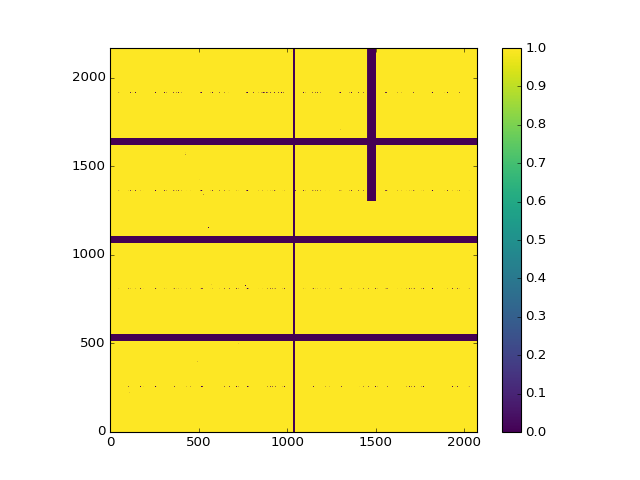

In [93]:
#mask = np.array ( ~new_mask* ~plgon_mask * md['pixel_mask']*mask_rh, dtype = bool )

fig, ax = plt.subplots()
im=ax.imshow(mask, origin='lower' ,vmin=0, vmax=1,cmap='viridis')
fig.colorbar(im)
plt.show()

## Save the combined mask to use in further data analysis

In [94]:
np.save(  path +   uid +"_mask", mask)

In [95]:
path +   uid +"_mask"

'/XF11ID/analysis/2016_3/masks/5765b8_mask'

In [96]:
#np.save(  path +   'Nov16_4M-GiSAXS' +"_mask", mask)

In [97]:
uid

'5765b8'